In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [28]:
%matplotlib inline

In [2]:
STATS_DIR = "/hg191/corpora/legaldata/data/stats/"
SEM_FEATS_FILE = os.path.join (STATS_DIR, "ops.temp.semfeat")
INDEG_FILE = os.path.join (STATS_DIR, "ops.ind")

In [114]:
ind = pd.read_csv (INDEG_FILE, sep=",", header=None, names=["opid", "indeg"])

In [225]:
semfeat = pd.read_csv (SEM_FEATS_FILE, sep=",", header=None, names=["opid", "semfeat"])

In [115]:
indegs = pd.Series([ind[ind["opid"] == opid]["indeg"].values[0] for opid in semfeat.opid.values])

In [226]:
semfeat["indeg"] = indegs

In [270]:
def labelPercentile (series):
    labels = list ()
    p50 = np.percentile (series, q=50)
    p75 = np.percentile (series, q=75)
    p90 = np.percentile (series, q=90)
    
    for value in series:
        if value <= p50:
            labels.append ("<=50")
        elif value <= p90:
            labels.append (">50")
        elif value > p90:
            labels.append (">90")
    return labels

In [280]:
semfeat["percentile"] = pd.Series (labelPercentile(semfeat["semfeat"].values))
df = semfeat[semfeat["indeg"] > 0]
df["log(indeg)"] = np.log(df["indeg"])

/nethome/ssoni30/venvs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


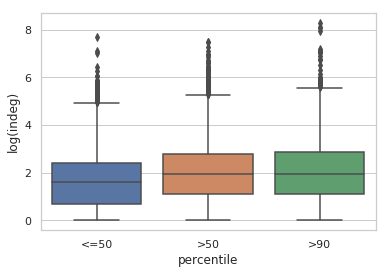

In [272]:
ax = sns.boxplot(x="percentile", y="log(indeg)", data=df, order=["<=50", ">50", ">90"])

In [288]:
vals = df[df["percentile"] == ">50"]["log(indeg)"].values
np.sort(vals)[int(len(vals)/2)]

1.9459101490553132

In [276]:
print(len(df[df["percentile"] == ">50"]))
print(len(df[df["percentile"] == ">90"]))

11394
1993


In [274]:
print (df[df["percentile"] == "<=50"]["log(indeg)"].median())
print (df[df["percentile"] == ">50"]["log(indeg)"].median())
print (df[df["percentile"] == ">90"]["log(indeg)"].median())
#print (semfeat[semfeat["percentile"] == ">P99"]["logindeg"].mean())

1.6094379124341003
1.9459101490553132
1.9459101490553132


In [186]:
print (semfeat[semfeat["percentile"] == "<=P50"]["logindeg"].mean())
print (semfeat[semfeat["percentile"] == ">P50"]["logindeg"].mean())
print (semfeat[semfeat["percentile"] == ">P90"]["logindeg"].mean())

1.3677560520966618
1.807529253586165
1.2936526699313982


In [ ]:
print (semfeat[semfeat["percentile"] == "<=P50"]["indeg"].median())
print (semfeat[semfeat["percentile"] == ">P50"]["indeg"].median())
print (semfeat[semfeat["percentile"] == ">P90"]["indeg"].median())

In [140]:
print (semfeat[semfeat["percentile"] == "<=P50"]["indeg"].median())
print (semfeat[semfeat["percentile"] == ">P50"]["indeg"].median())
print (semfeat[semfeat["percentile"] == ">P90"]["indeg"].median())

0.0
2.0
0.0


In [103]:
np.percentile(semfeat["semfeat"].values, q=90)

0.0005715677593967987

In [142]:
[semfeat["percentile"] == ">P90"]["indeg"].mean()

TypeError: list indices must be integers or slices, not str

In [141]:
semfeat[semfeat["percentile"] == ">P90"].tail(500)

,opid,semfeat,indeg,percentile,logindeg
44563,2496600,0.001515,0,>P90,0.000000
44567,1359866,0.027151,9,>P90,2.302585
44572,2628477,0.004435,0,>P90,0.000000
44610,4236215,0.017011,0,>P90,0.000000
44614,3955025,0.001032,0,>P90,0.000000
44617,1038704,0.001192,0,>P90,0.000000
44619,2712324,0.001380,0,>P90,0.000000
44621,2715565,0.016094,0,>P90,0.000000
44625,4339232,0.004281,0,>P90,0.000000
44654,624432,0.011871,0,>P90,0.000000


In [128]:
sorted(semfeat["indeg"], reverse=True)[0:10]

[3992, 3288, 3196, 2766, 2199, 1815, 1812, 1462, 1313, 1232]

In [175]:
semfeat[semfeat["indeg"].isin(sorted(semfeat["indeg"], reverse=True)[0:10])]

,opid,semfeat,indeg,percentile,logindeg
1477,106366,6.326029e-04,3288,>P90,11.683433
6960,110360,3.516532e-03,2766,>P90,11.434107
8087,110742,1.357993e-02,1313,>P90,10.359750
15825,1401302,1.471756e-07,1232,>P50,10.267957
22438,109479,6.213451e-07,1812,>P50,10.824163
27685,145841,0.000000e+00,2199,<=P50,11.103288
31326,103770,8.254886e-05,1815,>P50,10.826548
31848,106395,1.370464e-02,3992,>P90,11.963257
48004,110917,2.861466e-06,3196,>P50,11.642503
49867,118205,3.962791e-06,1462,>P50,10.514714


In [178]:
semfeat.loc[48004,]["semfeat"] =  1

In [179]:
semfeat[semfeat["indeg"].isin(sorted(semfeat["indeg"], reverse=True)[0:10])]

,opid,semfeat,indeg,percentile,logindeg
1477,106366,6.326029e-04,3288,>P90,11.683433
6960,110360,3.516532e-03,2766,>P90,11.434107
8087,110742,1.357993e-02,1313,>P90,10.359750
15825,1401302,1.471756e-07,1232,>P50,10.267957
22438,109479,6.213451e-07,1812,>P50,10.824163
27685,145841,0.000000e+00,2199,<=P50,11.103288
31326,103770,8.254886e-05,1815,>P50,10.826548
31848,106395,1.370464e-02,3992,>P90,11.963257
48004,110917,2.861466e-06,3196,>P50,11.642503
49867,118205,3.962791e-06,1462,>P50,10.514714


In [201]:
print(np.mean((semfeat[semfeat["percentile"] == "<=P50"]["indeg"] > 0).values))
print(np.mean((semfeat[semfeat["percentile"] == ">P50"]["indeg"] > 0).values))
print(np.mean((semfeat[semfeat["percentile"] == ">P90"]["indeg"] > 0).values))

0.49868
0.5697
0.3986


In [207]:
print (len(semfeat[(semfeat["percentile"] == "<=P50") & (semfeat["indeg"] > 0)]))
print (len(semfeat[(semfeat["percentile"] == ">P50") & (semfeat["indeg"] > 0)]))
print (len(semfeat[(semfeat["percentile"] == ">P90") & (semfeat["indeg"] > 0)]))

12467
11394
1993


In [213]:
print (semfeat[(semfeat["percentile"] == "<=P50") & (semfeat["indeg"] > 0)]["indeg"].mean())
print (semfeat[(semfeat["percentile"] == ">P50") & (semfeat["indeg"] > 0)]["indeg"].mean())
print (semfeat[(semfeat["percentile"] == ">P90") & (semfeat["indeg"] > 0)]["indeg"].mean())

10.696558915537018
17.132964718272774
30.600602107375817


In [214]:
print (semfeat[(semfeat["percentile"] == "<=P50") & (semfeat["indeg"] > 0)]["logindeg"].mean())
print (semfeat[(semfeat["percentile"] == ">P50") & (semfeat["indeg"] > 0)]["logindeg"].mean())
print (semfeat[(semfeat["percentile"] == ">P90") & (semfeat["indeg"] > 0)]["logindeg"].mean())

1.9011314895415956
2.1991992380250522
2.2496028619839286


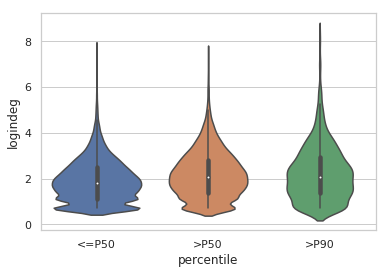

In [217]:
ax = sns.violinplot(x="percentile", y="logindeg", data=df, order=["<=P50", ">P50", ">P90"])

In [218]:
semfeat[semfeat["indeg"] == 1]

,opid,semfeat,indeg,percentile,logindeg
7,2566801,1.252931e-12,1,<=P50,0.693147
8,2311398,2.018162e-04,1,>P50,0.693147
20,2423616,0.000000e+00,1,<=P50,0.693147
22,2250142,9.621689e-07,1,>P50,0.693147
37,2287912,8.435677e-07,1,>P50,0.693147
59,1951929,5.139188e-05,1,>P50,0.693147
65,2017829,0.000000e+00,1,<=P50,0.693147
97,1690757,5.023650e-05,1,>P50,0.693147
111,3900821,0.000000e+00,1,<=P50,0.693147
126,2614981,3.879053e-04,1,>P50,0.693147
